In [20]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [21]:
data = pd.read_csv("./airlines.csv")
data

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [26]:
data["Total delay"] = data["Departure Delay in Minutes"] + data["Arrival Delay in Minutes"]
data["Total delay"]

0         43.0
1          7.0
2          0.0
3         20.0
4          0.0
          ... 
103899     3.0
103900     0.0
103901    21.0
103902     0.0
103903     0.0
Name: Total delay, Length: 103904, dtype: float64

In [29]:
gb = data.groupby("Customer Type")["Flight Distance"].mean()
gb
gb

Customer Type
Loyal Customer       1295.611377
disloyal Customer     714.463885
Name: Flight Distance, dtype: float64

<AxesSubplot:xlabel='Customer Type'>

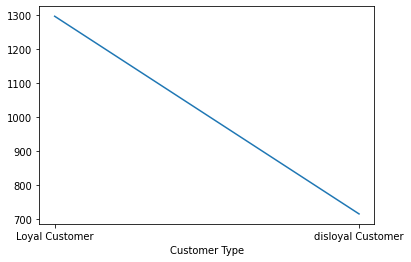

In [33]:
sns.lineplot(x=gb.index, y = gb.values)

In [39]:
notes = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
data["mean_note"] = data[notes].mean(axis=1)

In [41]:
data.sort_values("mean_note")

Unnamed: 0      id  Gender   Customer Type  Age   Type of Travel  \
20959       20959   16555    Male  Loyal Customer   32  Business travel   
89930       89930   21456  Female  Loyal Customer   22  Business travel   
27672       27672   79745  Female  Loyal Customer   28  Business travel   
20952       20952   13937  Female  Loyal Customer   53  Business travel   
38763       38763   55441  Female  Loyal Customer   55  Personal Travel   
...           ...     ...     ...             ...  ...              ...   
72581       72581   60205    Male  Loyal Customer   60  Business travel   
21845       21845  114589    Male  Loyal Customer   53  Business travel   
19921       19921  107282    Male  Loyal Customer   45  Business travel   
17786       17786   72374    Male  Loyal Customer   47  Business travel   
50196       50196   79525  Female  Loyal Customer   39  Business travel   

          Class  Flight Distance  Inflight wifi service  \
20959       Eco             1092                      0   
89930  Business              306                      0   
27672  Eco Plus              760                      1   
20952  Business             3492                      1   
38763       Eco             2521                      0   
...         ...              ...                    ...   
72581  Business             1506                      5   
21845  Business             3574                      5   
19921  Business              283                      5   
17786  Business             2582                      5   
50196  Business              762                      5   

       Departure/Arrival time convenient  ...  Leg room service  \
20959                                  0  ...                 1   
89930                                  0  ...                 1   
27672                                  1  ...                 2   
20952                                  1  ...                 1   
38763                                  1  ...                 1   
...                                  ...  ...               ...   
72581                                  5  ...                 5   
21845                                  5  ...                 5   
19921                                  5  ...                 5   
17786                                  5  ...                 5   
50196                                  5  ...                 5   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
20959                 1                1                 2            1   
89930                 2                1                 1            1   
27672                 2                1                 1            1   
20952                 1                2                 1            1   
38763                 2                1                 3            1   
...                 ...              ...               ...          ...   
72581                 5                5                 5            5   
21845                 5                5                 5            5   
19921                 5                5                 5            5   
17786                 5                5                 5            5   
50196                 5                5                 5            5   

       Departure Delay in Minutes  Arrival Delay in Minutes  \
20959                           0                       0.0   
89930                          50                      48.0   
27672                          22                      27.0   
20952                           3                       7.0   
38763                           0                       0.0   
...                           ...                       ...   
72581                           7                       0.0   
21845                          29                      23.0   
19921                          28                      81.0   
17786                           1                       0.0  

In [43]:
gb_mean_note = data.groupby("satisfaction")["mean_note"].mean()
gb_mean_note

satisfaction
neutral or dissatisfied    2.953585
satisfied                  3.616215
Name: mean_note, dtype: float64

<AxesSubplot:xlabel='satisfaction'>

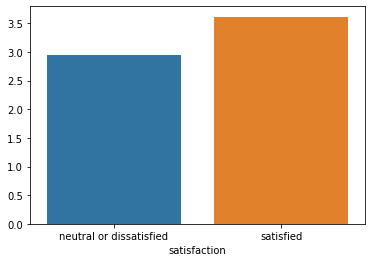

In [44]:
sns.barplot(x = gb_mean_note.index, y = gb_mean_note.values)

In [46]:
data["satisfaction_bool"] = data["satisfaction"] == "satisfied"

<AxesSubplot:xlabel='mean_note', ylabel='Count'>

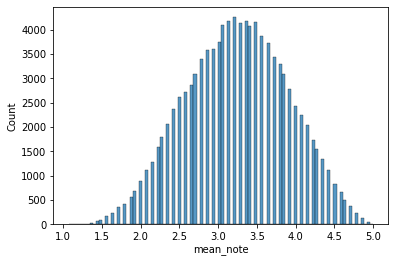

In [48]:
sns.histplot(data["mean_note"])

In [49]:
data

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Baggage handling  \
0                                       4  ...                 4   
1                                       2  ...                 3   
2                                       2  ...                 4   
3                                       5  ...                 3   
4                                       3  ...                 4   
...                                   ...  ...               ...   
103899                                  1  ...                 4   
103900                                  4  ...                 5   
103901                                  1  ...                 4   
103902                                  1  ...                 1   
103903                                  3  ...                 4   

        Checkin service  Inflight service  Cleanliness  \
0                     4                 5            5   
1                     1                 4            1   
2                     4                 4            5   
3                     1                 4            2   
4                     3                 3            3   
...                 ...               ...          ...   
103899                2                 3            2   
103900                5                 5            4   
103901                5                 5            4   
103902                5                 4            1   
103903                4                 3            1   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                               25                      18.0   
1                                1                       6.0   
2                                0                       0.0   
3                               11                       9.0   
4                                0                       0.0   
...                            ...                       ...   
103899                           3                       0.0   
103900                           0                       0.0   
103901                           7                      14.0   
103902                           0                       0.0   
103903                           0                       0.0   

                   satisfaction  Total delay  mean_note

In [52]:
data["over_18"] = data["Age"] >= 18
data["over_21"] = data["Age"] >= 21

In [58]:
data["age_class"] = (data["over_21"].astype("int") + data["over_18"].astype("int"))

<AxesSubplot:xlabel='age_class'>

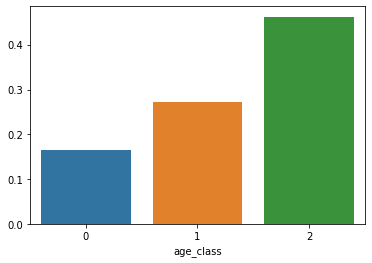

In [59]:
gb_age_class = data.groupby("age_class")["satisfaction_bool"].mean()
sns.barplot(x = gb_age_class.index, y = gb_age_class.values)

<AxesSubplot:xlabel='Class'>

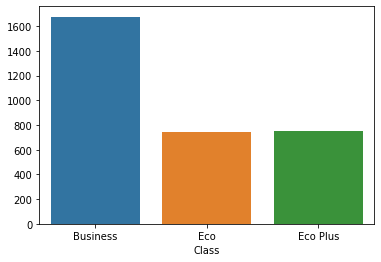

In [60]:
gb = data.groupby("Class")["Flight Distance"].mean()
sns.barplot(x = gb.index, y = gb.values)